In [1]:
import sys

sys.path.append("..")

In [2]:
from solution import Coords, GraphNode


def longest_path_length(
    nodes: dict[Coords, GraphNode],
    from_: Coords,
    to: Coords,
    with_path: bool = False,
) -> tuple[int | None, list[Coords] | None]:
    """Copy of the actual solution's code that also returns path"""

    def recurse(current: Coords, visited_bitset: int) -> tuple[int | None, list[Coords] | None]:
        if current == to:
            return 0, ([] if with_path else None)
        max_path_length: int | None = None
        max_path: list[Coords] | None = None
        for adjacent, path in nodes[current].connections:
            visited_adjacent = 1 << nodes[adjacent].id
            if visited_bitset & visited_adjacent:
                continue
            subpath_length, subpath = recurse(
                adjacent,
                visited_bitset=visited_bitset | (1 << nodes[adjacent].id),
            )
            if subpath_length is not None:
                path_length = len(path) + subpath_length
                if max_path_length is None or path_length > max_path_length:
                    max_path_length = path_length
                    if with_path and subpath is not None:
                        max_path = path + subpath
        return max_path_length, max_path

    return recurse(from_, 0)

In [3]:
from pathlib import Path
from solution import parse_simple_map, find_start_and_target, hikes_graph

inp = Path("input.txt").read_text()
map = parse_simple_map(inp)
start, target = find_start_and_target(map)
graph = hikes_graph(map, start, target, follow_slopes=True)

In [4]:
import time

t1 = time.time()
_, longest_path = longest_path_length(graph, start, target, with_path=True)
assert longest_path is not None
print(time.time() - t1)

0.0013458728790283203


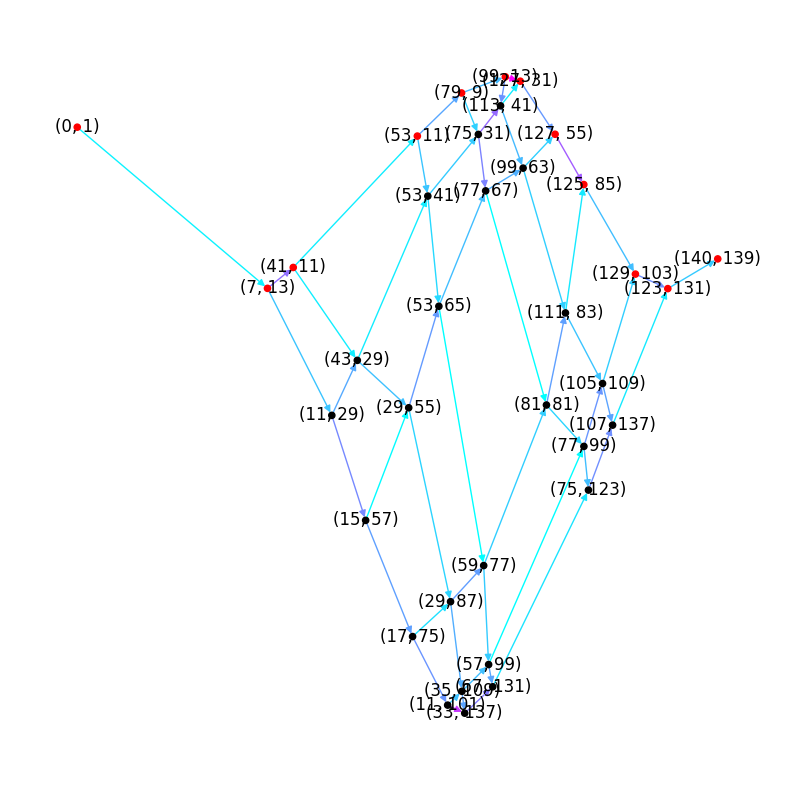

In [7]:
import itertools
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt

g = nx.DiGraph()

edge_lengths = dict(
    itertools.chain.from_iterable(
        [((n.coords, c), len(path)) for c, path in n.connections] for n in graph.values()
    )
)

g.add_weighted_edges_from((u, v, length) for (u, v), length in edge_lengths.items())

fig, ax = plt.subplots(figsize=(10, 10))


nx.draw(
    g,
    pos=nx.spectral_layout(g),
    ax=ax,
    node_size=20,
    with_labels=True,
    node_color=["red" if n in longest_path or n == start else "black" for n in g.nodes],
    edge_color=[edge_lengths[e] for e in g.edges],
    edge_cmap=matplotlib.colormaps["cool"],
)

In [6]:
t1 = time.time()
list(len(p) for p in nx.simple_paths.all_simple_edge_paths(g, source=start, target=target))
print(time.time() - t1)

0.001238107681274414
